In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import random
import tensorflow as tf
from keras import layers, models, datasets
import tensorflow_datasets as tfds


ds, ds_info = tfds.load("food101", shuffle_files=True, as_supervised=True, with_info=True)
train_ds, valid_ds = ds["train"], ds["validation"]

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Showing Example of the dataset

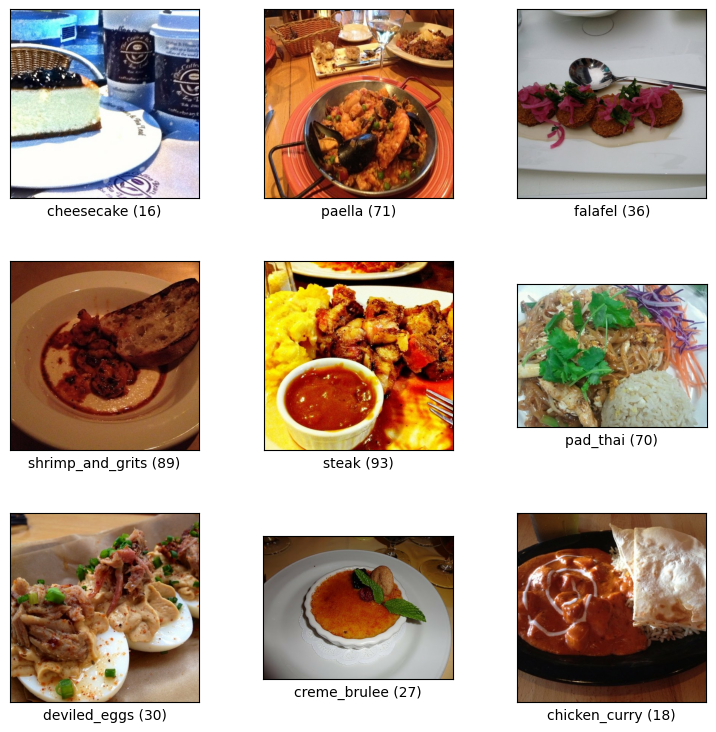

In [3]:
fig = tfds.show_examples(train_ds, ds_info)

In [4]:
MAX_SIZE_LEN = 128
HOT_DOG_CLASS = 55

train_ds = train_ds.map(
    lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIZE_LEN, MAX_SIZE_LEN]), dtype=tf.int32), tf.cast(label == HOT_DOG_CLASS, dtype=tf.int32))
)

valid_ds = valid_ds.map(
    lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIZE_LEN, HOT_DOG_CLASS]), dtype=tf.int32), tf.cast(label == HOT_DOG_CLASS, dtype=tf.int32))
)


## Showing the filtered dataset (Hod dog = 1, something else = 0)

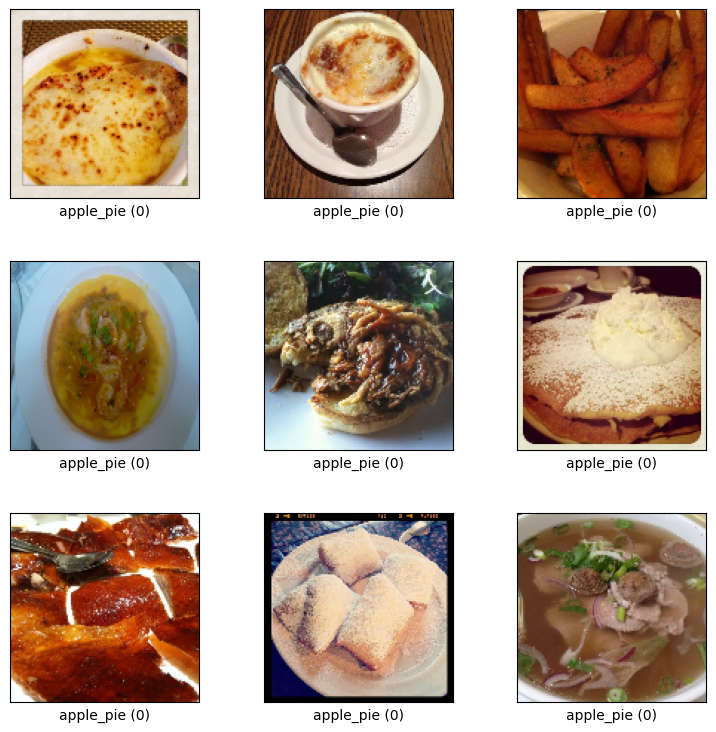

In [5]:
fig = tfds.show_examples(train_ds, ds_info)

In [6]:
train_hd_size, valid_hd_size = 750, 250

train_hotdogs = train_ds.filter(lambda _, label: label == 1).repeat(3)
train_nothotdogs = train_ds.filter(lambda _, label: label == 0)

valid_hotdogs = valid_ds.filter(lambda _, label: label == 1).repeat(3)
valid_nothotdogs = valid_ds.filter(lambda _, label: label == 0)

train_hotdogs

<_RepeatDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [7]:
batch_size = 16

train_ds = tf.data.Dataset.sample_from_datasets([train_hotdogs, train_nothotdogs], weights=[0.5, 0.5], stop_on_empty_dataset=True)
train_ds = train_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

valid_ds = tf.data.Dataset.sample_from_datasets([valid_hotdogs, valid_nothotdogs], weights=[0.5, 0.5], stop_on_empty_dataset=True)
valid_ds = valid_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)